#### **Step 1**
  Mount to google drive for backup


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#### **Step 2**

Make folders for saving :

*   Checkpoints after every 10th epoch
*   Best model based on lowest MAE



In [ ]:
import os

BASE_DIR = '/content/drive/MyDrive/STA_DRN_PROJECT'
CODE_DIR = os.path.join(BASE_DIR, 'STA-DRN')
CHECKPOINT_DIR = os.path.join(BASE_DIR, 'checkpoints')
MODEL_DIR = os.path.join(BASE_DIR, 'model')

DATA_DIR = '/content/dataset'


#### **Step 3**

Importing github repository


In [ ]:
!git clone https://github.com/divertingPan/STA-DRN.git {CODE_DIR}


fatal: destination path '/content/drive/MyDrive/STA_DRN_PROJECT/STA-DRN' already exists and is not an empty directory.


In [ ]:
!ls /content/drive/MyDrive/STA_DRN_PROJECT


checkpoints  model  STA-DRN


#### **Step 4**

Installing required libraries

In [ ]:
!pip install torch torchvision opencv-python dlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
!pwd

/content


In [ ]:
!pip list | grep -E 'torch|opencv|dlib'

dlib                                  19.24.6
launchpadlib                          1.10.16
opencv-contrib-python                 4.11.0.86
opencv-python                         4.11.0.86
opencv-python-headless                4.11.0.86
torch                                 2.6.0+cu124
torchao                               0.10.0
torchaudio                            2.6.0+cu124
torchdata                             0.11.0
torchsummary                          1.5.1
torchtune                             0.6.1
torchvision                           0.21.0+cu124


#### **Optional**
As I have dataset in zip folder so I unzip it and place it in colab.

In [ ]:
!unzip -o '/content/drive/MyDrive/avec2014_preprocessed.zip' -d /content


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/avec14/image/train_Northwind/317_3_Northwind_video_aligned/0213.jpg  
  inflating: /content/dataset/avec14/image/train_Northwind/317_3_Northwind_video_aligned/0216.jpg  
  inflating: /content/dataset/avec14/image/train_Northwind/317_3_Northwind_video_aligned/0219.jpg  
  inflating: /content/dataset/avec14/image/train_Northwind/317_3_Northwind_video_aligned/0222.jpg  
  inflating: /content/dataset/avec14/image/train_Northwind/317_3_Northwind_video_aligned/0225.jpg  
  inflating: /content/dataset/avec14/image/train_Northwind/317_3_Northwind_video_aligned/0228.jpg  
  inflating: /content/dataset/avec14/image/train_Northwind/317_3_Northwind_video_aligned/0231.jpg  
  inflating: /content/dataset/avec14/image/train_Northwind/317_3_Northwind_video_aligned/0234.jpg  
  inflating: /content/dataset/avec14/image/train_Northwind/317_3_Northwind_video_aligned/0237.jpg  
  inflating: /content/dataset/avec14/image/train_

In [ ]:
!ls /content/dataset/avec14

image


In [ ]:
!mv /content/labels_updated.csv /content/dataset/avec14/labels.csv


In [ ]:
!head /content/dataset/avec14/labels.csv

filename,BDI-II
Northwind_Training/203_1_Northwind_video_aligned,3
Freeform_Training/203_1_Freeform_video_aligned,3
Northwind_Training/205_2_Northwind_video_aligned,3
Freeform_Training/205_2_Freeform_video_aligned,3
Northwind_Training/207_2_Northwind_video_aligned,10
Freeform_Training/207_2_Freeform_video_aligned,10
Northwind_Training/208_2_Northwind_video_aligned,4
Freeform_Training/208_2_Freeform_video_aligned,4
Northwind_Training/209_1_Northwind_video_aligned,6


In [ ]:
!mv /content/dataset/avec14/image/train_Northwind /content/dataset/avec14/image/Northwind_Training
!mv /content/dataset/avec14/image/train_Freeform /content/dataset/avec14/image/Freeform_Training
!mv /content/dataset/avec14/image/test_Northwind /content/dataset/avec14/image/Northwind_Testing
!mv /content/dataset/avec14/image/test_Freeform /content/dataset/avec14/image/Freeform_Testing
!mv /content/dataset/avec14/image/dev_Northwind /content/dataset/avec14/image/Northwind_Development
!mv /content/dataset/avec14/image/dev_Freeform /content/dataset/avec14/image/Freeform_Development


In [ ]:
!ls

dataset  drive	sample_data


In [ ]:
%cd /content


/content


In [ ]:
os.makedirs(CHECKPOINT_DIR, exist_ok=True)
os.makedirs(MODEL_DIR, exist_ok=True)


#### **Step 5**

Update the train.py according to paper parameters and set the right directories


In [ ]:
%%writefile /content/drive/MyDrive/STA_DRN_PROJECT/STA-DRN/train.py
import os
import time
import math
import torch.nn as nn
import numpy as np
import pandas as pd
from TSSTANet.tsstanet import tanet, sanet, stanet, stanet_af
import torch.optim as optim
import torch.utils.data
from dataloader.main_dataloader import MainDataset as Dataset
from dataloader.main_dataloader import ValDataset
from dataloader import transforms3d
from torch.utils.data import DataLoader
from torchvision.transforms import transforms

torch.multiprocessing.set_sharing_strategy('file_system')
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
BATCHSIZE = 5
EPOCHS = 200
LOG_STEP = 10
SAVE_EVERY = 10
SCORE_RANGE = 63
optimizer_name = 'Adam'
lr = 0.005
frame_len = 64
features = 16
sigma = 1
input_channel = 3
img_size = 224


Net = stanet_af(layers=[2, 2, 2, 2], in_channels=input_channel, num_classes=1, k=2, features=features)
Net = torch.nn.DataParallel(Net)
Net = Net.to(DEVICE)

optimizer = getattr(optim, optimizer_name)(Net.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 50, 2)

MSE_loss_func = nn.MSELoss()
MAE_loss_func = nn.L1Loss()

MODEL_DIR = '/content/drive/MyDrive/STA_DRN_PROJECT/model'
CHECKPOINT_DIR = '/content/drive/MyDrive/STA_DRN_PROJECT/checkpoints'
checkpoint_path = os.path.join(CHECKPOINT_DIR, 'latest_checkpoint.pth')

df = pd.read_csv('/content/dataset/avec14/labels.csv')
image_path_list = df['filename'].values
label_list = df['BDI-II'].values

train_image_path_list = image_path_list[:100]
train_label_list = label_list[:100]
val_image_path_list = image_path_list[100:200]
val_label_list = label_list[100:200]

train_transform = transforms.Compose([
    transforms3d.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms3d.RandomHorizontalFlip()
])
val_transform = None

train_data = Dataset(img_path=train_image_path_list, label_value=train_label_list, dataset='avec14',
                     frame_len=frame_len, img_size=224, input_channel=3, transform=train_transform)
train_loader = DataLoader(train_data, batch_size=BATCHSIZE, shuffle=True, num_workers=2)
val_data = ValDataset(img_path=val_image_path_list, label_value=val_label_list, dataset='avec14',
                      frame_len=frame_len, img_size=224, input_channel=3, transform=val_transform)
val_loader = DataLoader(val_data, batch_size=1, shuffle=False, num_workers=2)

metrics_file = os.path.join(MODEL_DIR, 'metrics_log.csv')
if os.path.exists(metrics_file):
    metrics_df = pd.read_csv(metrics_file)
else:
    metrics_df = pd.DataFrame(columns=['epoch', 'train_mae', 'train_rmse', 'val_mae', 'val_rmse'])
best_MAE = float('inf')
total_step = math.ceil(len(train_image_path_list) / BATCHSIZE)

start_epoch = 0
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'), weights_only=False)
    Net.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    best_MAE = checkpoint['best_mae']
    print(f"Resuming training from epoch {start_epoch}")

for epoch in range(start_epoch, EPOCHS):
    Net.train()
    RMSE_loss, MAE_loss = [], []

    for step, (train_img, train_label) in enumerate(train_loader):
        predict = Net(train_img.to(DEVICE)) * SCORE_RANGE
        predict = predict.view(predict.size(0))
        train_label = train_label + np.random.normal(0, sigma, train_label.shape[0])
        train_label = train_label.float().to(DEVICE)

        loss = MSE_loss_func(predict, train_label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        RMSE_loss.append(MSE_loss_func(predict, train_label).item())
        MAE_loss.append(MAE_loss_func(predict, train_label).item())

        if (step + 1) % LOG_STEP == 0:
            print(f"Epoch {epoch}, Step {step+1}/{total_step} | MAE: {np.mean(MAE_loss):.4f}, RMSE: {np.sqrt(np.mean(RMSE_loss)):.4f}")

    scheduler.step()

    Net.eval()
    val_RMSE, val_MAE = [], []
    with torch.no_grad():
        for step, (val_img_pack, val_label) in enumerate(val_loader):
            predict_list = []
            for val_img in val_img_pack:
                pred = Net(val_img.to(DEVICE)).view(val_img.size(0))
                pred = torch.clamp(pred.mean().unsqueeze(0) * SCORE_RANGE, 0, SCORE_RANGE)
                predict_list.append(pred.item())

            pred_mean = torch.tensor(np.mean(predict_list)).unsqueeze(0)
            val_RMSE.append(MSE_loss_func(pred_mean, val_label))
            val_MAE.append(MAE_loss_func(pred_mean, val_label))

    mean_train_mae = np.mean(MAE_loss)
    mean_train_rmse = np.sqrt(np.mean(RMSE_loss))
    mean_val_mae = np.mean(val_MAE)
    mean_val_rmse = np.sqrt(np.mean(val_RMSE))

    metrics_df.loc[len(metrics_df)] = [epoch, mean_train_mae, mean_train_rmse, mean_val_mae, mean_val_rmse]
    metrics_df.to_csv(metrics_file, index=False)

    print(f"Epoch {epoch} Summary | Train MAE: {mean_train_mae:.4f}, Val MAE: {mean_val_mae:.4f}")

    if (epoch + 1) % SAVE_EVERY == 0:
        torch.save({
            'epoch': epoch,
            'model_state_dict': Net.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'best_mae': best_MAE
        },os.path.join(CHECKPOINT_DIR, f'epoch_{epoch+1}.pth'))

        torch.save({
            'epoch': epoch,
            'model_state_dict': Net.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'best_mae': best_MAE
        }, checkpoint_path)

    if mean_val_mae < best_MAE:
        best_MAE = mean_val_mae
        torch.save(Net.module.state_dict(), os.path.join(MODEL_DIR, 'best_model.pth'))
        print(f"New Best Model Saved | MAE: {best_MAE:.4f}, RMSE: {mean_val_rmse:.4f}")

print("\nTraining Complete")


Overwriting /content/drive/MyDrive/STA_DRN_PROJECT/STA-DRN/train.py


In [ ]:
%run /content/drive/MyDrive/STA_DRN_PROJECT/STA-DRN/train.py


Resuming training from epoch 160


/content/drive/MyDrive/STA_DRN_PROJECT/STA-DRN/train.py:99: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  train_label = train_label + np.random.normal(0, sigma, train_label.shape[0])


#### **Step 6**

Testing the model based on best_model.pth obtained from training phase


In [ ]:
%%writefile /content/drive/MyDrive/STA_DRN_PROJECT/STA-DRN/test.py

import os
import time
import math
import torch.nn as nn
import numpy as np
import pandas as pd
from TSSTANet.tsstanet import tanet, sanet, stanet, stanet_af
import torch.optim as optim
import torch.utils.data
from dataloader.main_dataloader import ValDataset
from dataloader import transforms3d
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--sigma", default=0, type=int)
parser.add_argument("--size", default=0, type=int)
args = parser.parse_args()

torch.multiprocessing.set_sharing_strategy('file_system')
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCHSIZE = 1
frame_len = 64
SCORE_RANGE = 63

BASE_DIR = '/content/drive/MyDrive/STA_DRN_PROJECT'
MODEL_DIR = os.path.join(BASE_DIR, 'model')
RESULT_DIR = os.path.join(BASE_DIR, 'results')
os.makedirs(RESULT_DIR, exist_ok=True)

Net = stanet_af(layers=[2, 2, 2, 2], in_channels=3, num_classes=1, k=2, features=16)
Net.load_state_dict(torch.load(os.path.join(MODEL_DIR, 'best_model_pretrained.pth'), map_location=DEVICE))
Net = Net.to(DEVICE)
Net.eval()

MSE_loss_func = nn.MSELoss()
MAE_loss_func = nn.L1Loss()

df = pd.read_csv('/content/dataset/avec14/labels.csv')
image_path_list = df['filename'].values
label_list = df['BDI-II'].values

test_image_path_list = image_path_list[200:300]
test_label_list = label_list[200:300]
transform_list = []

if args.sigma > 0:
    transform_list.append(transforms3d.Noise(sigma=args.sigma))
if args.size > 0 and args.size % 2 == 1:
    transform_list.append(transforms3d.Blurring(size=args.size))

test_transform = transforms.Compose(transform_list) if transform_list else None

test_data = ValDataset(
    img_path=test_image_path_list,
    label_value=test_label_list,
    dataset='avec14',
    frame_len=frame_len,
    img_size=224,
    input_channel=3,
    transform=test_transform
)

test_loader = DataLoader(test_data, batch_size=BATCHSIZE, shuffle=False, num_workers=2)

RMSE_loss = []
MAE_loss = []
results_list = []

with torch.no_grad():
    for step, (test_img_pack, test_label) in enumerate(test_loader):
        predict_list = []
        for val_img in test_img_pack:
            pred = Net(val_img.to(DEVICE))
            pred = torch.relu(pred) * SCORE_RANGE
            pred = pred.view(pred.size(0))
            for value in pred:
              predict_list.append(value.item())

        predict = torch.tensor(np.mean(predict_list)).unsqueeze(0)
        rmse = MSE_loss_func(predict, test_label).item()
        mae = MAE_loss_func(predict, test_label).item()

        RMSE_loss.append(rmse)
        MAE_loss.append(mae)

        results_list.append({
            'index': step + 1,
            'true_label': test_label.item(),
            'predicted_score': predict.item(),
            'mae': mae,
            'rmse': math.sqrt(rmse)
        })

        if (step + 1) % 10 == 0:
            print(f'Step {step+1} | True: {test_label.item():.4f} | Predicted: {predict.item():.4f}')

        if (step + 1) % 10 == 0 or (step + 1) == len(test_loader):
            pd.DataFrame(results_list).to_csv(os.path.join(RESULT_DIR, 'test_results_partial.csv'), index=False)

mean_mae = np.mean(MAE_loss)
mean_rmse = np.sqrt(np.mean(RMSE_loss))
timestamp = time.strftime('%Y-%m-%d-%H_%M_%S')

results_df = pd.DataFrame(results_list)
results_df.to_csv(os.path.join(RESULT_DIR, f'test_results_{timestamp}.csv'), index=False)

with open(os.path.join(RESULT_DIR, f'metrics_{timestamp}.txt'), 'w') as f:
    f.write(f'MAE: {mean_mae:.4f}\nRMSE: {mean_rmse:.4f}\n')

print(f"\nTesting completed at {timestamp}")
print(f"Results saved in: {RESULT_DIR}")
print(f"Final MAE: {mean_mae:.4f} | RMSE: {mean_rmse:.4f}")


Overwriting /content/drive/MyDrive/STA_DRN_PROJECT/STA-DRN/test.py


In [ ]:
%run /content/drive/MyDrive/STA_DRN_PROJECT/STA-DRN/test.py


Step 10 | True: 5.0000 | Predicted: 5.6531
Step 20 | True: 29.0000 | Predicted: 22.8738
Step 30 | True: 11.0000 | Predicted: 17.6132
Step 40 | True: 21.0000 | Predicted: 13.9837
Step 50 | True: 4.0000 | Predicted: 26.3969
Step 60 | True: 0.0000 | Predicted: 12.9257
Step 70 | True: 0.0000 | Predicted: 6.7608
Step 80 | True: 3.0000 | Predicted: 4.1519
Step 90 | True: 15.0000 | Predicted: 11.8568
Step 100 | True: 11.0000 | Predicted: 11.3049

✅ Testing completed at 2025-07-15-06_57_52
📁 Results saved in: /content/drive/MyDrive/STA_DRN_PROJECT/results
📊 Final MAE: 9.3613 | RMSE: 11.9410


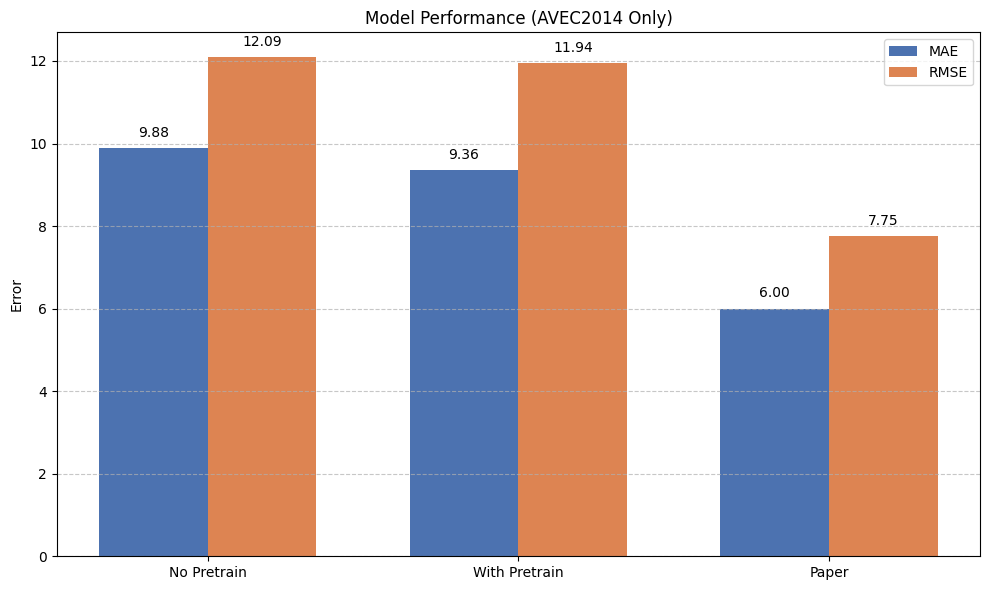

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['No Pretrain', 'With Pretrain', 'Paper']
mae_values = [9.88, 9.36, 6.00]
rmse_values = [12.09, 11.94, 7.75]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mae_values, width, label='MAE', color='#4c72b0')
bars2 = ax.bar(x + width/2, rmse_values, width, label='RMSE', color='#dd8452')

ax.set_ylabel('Error')
ax.set_title('Model Performance (AVEC2014 Only)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


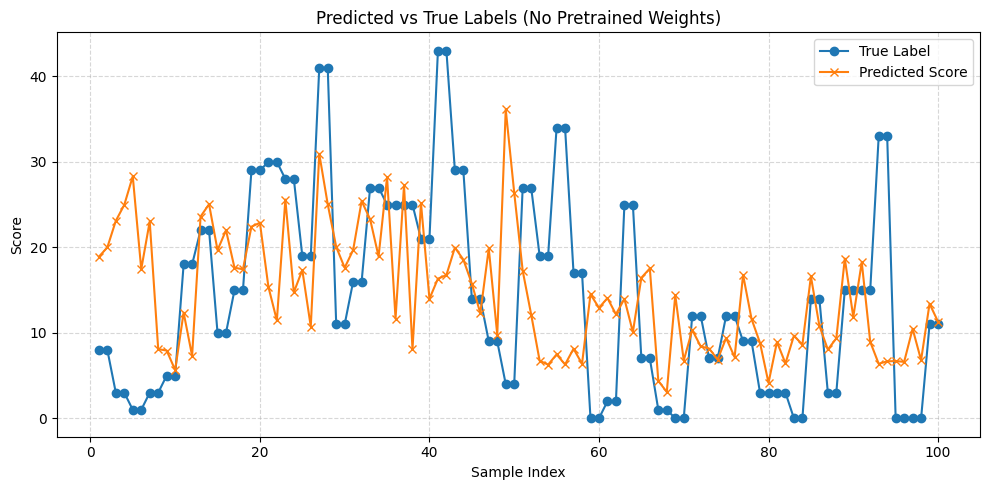

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/STA_DRN_PROJECT/results/test_results_2025-07-15-06_57_52.csv')

plt.figure(figsize=(10, 5))
plt.plot(df['index'], df['true_label'], label='True Label', marker='o')
plt.plot(df['index'], df['predicted_score'], label='Predicted Score', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Score')
plt.title('Predicted vs True Labels (No Pretrained Weights)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/STA_DRN_PROJECT/results/predicted_vs_true_pretrained.png')
plt.show()
